
The feature selection notebook does a filter followed by a wrapper. It's capable of doing the filter on more than one file. The variable files are called vars1.csv, vars2.csv ...

The filter runs separately on each vars file and keeps the top num_filter variables from each file. If there are more than one vars files we'll again select the top num_filter variables across all the vars.csv files.

If balance = 0 the entire files are used. If balance != 0 then balance is the ratio of goods to bads retained for the rest of the feature selection. We keep all the rare class (bads) and downsample the goods. 

BUT RIGHT NOW I'VE GOT A BUG SOMEWHERE: balance !=0 doesn't work when num_files > 1. I've got an index problem.

So you can run with multiple variables files only when balance=0, or you can run with only one variable file and set balance how you like.

In [1]:
# load libraries
# %pip install mlxtend

import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import datetime as dt
import gc
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
%matplotlib inline
start_time = dt.datetime.now()

In [2]:
# set some parameters
num_files = 1
num_filter = 100
num_wrapper = 30
# keep balance = 0 when num_files > 1 until I figure out this bug. Maybe somebody else can figure it out.
balance = 0
detect_rate = .03
index_name = 'record'
y_name = 'fraud_label'
good_label = 0
bad_label = 1

## Run a filter on all the files

In [3]:
dftemp = pd.read_csv('vars1.csv')

/Users/chinmayibengaluruprakash/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
dftemp.head(2)

,Unnamed: 0,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,...,ssnname_dob_unique_count_for_ssnname_7,ssnname_dob_unique_count_for_ssnname_14,ssnname_dob_unique_count_for_ssnname_30,ssnname_dob_unique_count_for_ssnname_60,ssnname_dob_unique_count_for_ssnfulladdress_1,ssnname_dob_unique_count_for_ssnfulladdress_3,ssnname_dob_unique_count_for_ssnfulladdress_7,ssnname_dob_unique_count_for_ssnfulladdress_14,ssnname_dob_unique_count_for_ssnfulladdress_30,ssnname_dob_unique_count_for_ssnfulladdress_60
0,0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,000000-1,1797504115,...,1,1,1,1,1,1,1,1,1,1
1,1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,...,1,1,1,1,1,1,1,1,1,1


In [8]:
dftemp.columns.to_list()

['Unnamed: 0',
 'record',
 'date',
 'ssn',
 'firstname',
 'lastname',
 'address',
 'zip5',
 'dob',
 'homephone',
 'fraud_label',
 'dow',
 'low_risk',
 'name',
 'fulladdress',
 'name_zip5',
 'name_address',
 'SNPD',
 'ssndob_homephone',
 'ssnfulladdress_homephone',
 'ssnfulladdress_dob',
 'ssnname_homephone',
 'ssnname_fulladdress',
 'dob_firstname',
 'dob_lastname',
 'dob_address',
 'dob_zip5',
 'homephone_firstname',
 'homephone_lastname',
 'homephone_address',
 'homephone_zip5',
 'homephone_name_fulladdress',
 'homephone_fulladdress_dob',
 'zip3',
 'shortaddress',
 'shortdob',
 'shortadd_zip5',
 'shortadd_zip3',
 'shortdob_add',
 'shortdob_add_zip5',
 'shortdob_add_zip3',
 'ssn_zip3',
 'address_zip3',
 'dob_zip3',
 'homephone_zip3',
 'name_zip5_day_since',
 'name_zip5_count_0',
 'name_zip5_count_1',
 'name_zip5_count_3',
 'name_zip5_count_7',
 'name_zip5_count_14',
 'name_zip5_count_30',
 'name_zip5_count_60',
 'name_address_day_since',
 'name_address_count_0',
 'name_address_count_1

In [4]:
df = dftemp.select_dtypes(['number'])

In [9]:
df.columns.to_list()

['Unnamed: 0',
 'record',
 'zip5',
 'fraud_label',
 'low_risk',
 'zip3',
 'name_zip5_day_since',
 'name_zip5_count_0',
 'name_zip5_count_1',
 'name_zip5_count_3',
 'name_zip5_count_7',
 'name_zip5_count_14',
 'name_zip5_count_30',
 'name_zip5_count_60',
 'name_address_day_since',
 'name_address_count_0',
 'name_address_count_1',
 'name_address_count_3',
 'name_address_count_7',
 'name_address_count_14',
 'name_address_count_30',
 'name_address_count_60',
 'SNPD_day_since',
 'SNPD_count_0',
 'SNPD_count_1',
 'SNPD_count_3',
 'SNPD_count_7',
 'SNPD_count_14',
 'SNPD_count_30',
 'SNPD_count_60',
 'ssndob_homephone_day_since',
 'ssndob_homephone_count_0',
 'ssndob_homephone_count_1',
 'ssndob_homephone_count_3',
 'ssndob_homephone_count_7',
 'ssndob_homephone_count_14',
 'ssndob_homephone_count_30',
 'ssndob_homephone_count_60',
 'ssnfulladdress_homephone_day_since',
 'ssnfulladdress_homephone_count_0',
 'ssnfulladdress_homephone_count_1',
 'ssnfulladdress_homephone_count_3',
 'ssnfulladdr

In [5]:
df.shape

(1000000, 1045)

In [95]:
%%time
for i in range(num_files):
    file_name = "vars1"+'.csv'
    
    print('work on file ', file_name)
    df = df[df[index_name] <= 833508] # remove the last two months as the out-of-time data (OOT)
    df = df[df[index_name] >= 38512] # remove the first 2 weeks of records since their variables aren't well formed
    df['RANDOM'] = np.random.ranf(len(df)) # add a random number variable to make sure it doesn't come up as important
    goods = df[df[y_name] == good_label]
    bads = df[df[y_name] == bad_label]
    del df # don't need this file anymore
    num_goods = len(goods)
    num_bads = len(bads)
    num_vars = len(bads.columns)-2
    if(balance != 0):
        if(i == 0):
            num_goods_desired = int(min(num_goods,num_bads*balance))
            goods = goods.sample(n=num_goods_desired,random_state=1)
            goods_keep = list(goods.index)
            goods_keep.sort()
    
        if(i > 0):
            goods.set_index(index_name, inplace=True)
            goods.sort_index(inplace=True)
            goods = goods.iloc[goods_keep] # THERE'S SOMETHING WRONG HERE AND I CAN'T FIGURE IT OUT
            
    df_sampled = pd.concat([goods,bads])
    df_sampled.set_index(index_name, inplace=True)
    df_sampled.sort_index(inplace=True)
    if(i == 0): # if first time through need to initialize some stuff
        Y = pd.DataFrame(df_sampled[y_name], index=df_sampled.index)
        filter_score = pd.DataFrame(np.zeros((num_vars+1,2)))
        filter_score.columns = ['variable','score']   
        j = 0
        for column in df_sampled:
            filter_score.loc[j,'variable'] = column
            filter_score.loc[j,'score'] = sps.ks_2samp(goods[column],bads[column])[0]
            j = j+1
            
        filter_score.sort_values(by=['score'], ascending=False, inplace=True)
        vars_keep = list(filter_score['variable'][1:num_filter+1])
        print(filter_score.head(num_filter))
        df_top = df_sampled.filter(vars_keep, axis=1)
            
    if(i > 0): # if more than one variable file we use this loop
        new = pd.DataFrame(np.zeros((num_vars+1,2)))
        new.columns = ['variable','score']   
        j = 0
        for column in df_sampled:
            new.loc[j,'variable'] = column
            new.loc[j,'score'] = sps.ks_2samp(goods[column],bads[column])[0]
            j = j+1
        
        new.sort_values(by=['score'], ascending=False, inplace=True)
        vars_keep = list(new['variable'][1:num_filter+1])
        print(new.head(num_filter))
        data_new_top = df_sampled.filter(vars_keep, axis=1)
        df_top = pd.concat([df_top,data_new_top], axis=1)
        filter_score = pd.concat([filter_score,new])
    
    del goods # delete these before starting the next file, if any
    del bads
    gc.collect()

work on file  vars1.csv
                               variable     score
2                           fraud_label  1.000000
198              address_zip3_day_since  0.333283
226               fulladdress_day_since  0.333210
163             shortadd_zip3_day_since  0.332579
156             shortadd_zip5_day_since  0.332461
..                                  ...       ...
218             homephone_zip3_count_30  0.229315
131             homephone_zip5_count_30  0.229212
253            fulladdress_dob_count_30  0.228954
147  homephone_fulladdress_dob_count_30  0.228954
77               dob_lastname_day_since  0.228729

[100 rows x 2 columns]
CPU times: user 2min 2s, sys: 40.4 s, total: 2min 42s
Wall time: 1min 52s


In [96]:
filter_score.sort_values(by=['score'], ascending=False, inplace=True)

In [97]:
filter_score.head(30)

,variable,score
2,fraud_label,1.000000
198,address_zip3_day_since,0.333283
226,fulladdress_day_since,0.333210
163,shortadd_zip3_day_since,0.332579
156,shortadd_zip5_day_since,0.332461
169,shortadd_zip3_count_30,0.332107
204,address_zip3_count_30,0.332105
232,fulladdress_count_30,0.332032
162,shortadd_zip5_count_30,0.332017
168,shortadd_zip3_count_14,0.321921


In [98]:
filter_score.tail(10)

,variable,score
635,fulladdress_dob_unique_count_for_fulladdress_60,0.0
1025,ssnname_dob_unique_count_for_ssnlastname_60,0.0
632,fulladdress_dob_unique_count_for_fulladdress_7,0.0
631,fulladdress_dob_unique_count_for_fulladdress_3,0.0
806,ssnzip5_unique_count_for_ssn_7,0.0
1024,ssnname_dob_unique_count_for_ssnlastname_30,0.0
749,ssnlastname_unique_count_for_ssn_60,0.0
748,ssnlastname_unique_count_for_ssn_30,0.0
1023,ssnname_dob_unique_count_for_ssnlastname_14,0.0
925,ssnfulladdress_unique_count_for_ssn_3,0.0


In [99]:
filter_score.shape

(1045, 2)

In [100]:
filter_score.sort_values(by=['score'], ascending=False, inplace=True)
vars_keep = list(filter_score['variable'][num_files:num_filter+3])
print(i,' vars_keep:',vars_keep)

0  vars_keep: ['address_zip3_day_since', 'fulladdress_day_since', 'shortadd_zip3_day_since', 'shortadd_zip5_day_since', 'shortadd_zip3_count_30', 'address_zip3_count_30', 'fulladdress_count_30', 'shortadd_zip5_count_30', 'shortadd_zip3_count_14', 'address_zip3_count_14', 'fulladdress_count_14', 'shortadd_zip5_count_14', 'shortaddress_count_30', 'shortadd_zip3_count_7', 'address_zip3_count_7', 'fulladdress_count_7', 'shortadd_zip5_count_7', 'shortaddress_day_since', 'shortaddress_count_14', 'shortaddress_count_7', 'fulladdress_count_0_by_30', 'fulladdress_unique_count_for_dob_homephone_60', 'fulladdress_unique_count_for_ssnname_60', 'fulladdress_unique_count_for_ssnlastname_60', 'fulladdress_unique_count_for_ssnzip5_60', 'fulladdress_unique_count_for_ssnfulladdress_60', 'fulladdress_unique_count_for_ssn_60', 'fulladdress_unique_count_for_ssnname_dob_60', 'fulladdress_unique_count_for_name_fulladdress_60', 'fulladdress_unique_count_for_name_dob_60', 'fulladdress_unique_count_for_dob_home

In [101]:
df_keep = df_top.filter(vars_keep, axis=1)
df_keep.head()

,address_zip3_day_since,fulladdress_day_since,shortadd_zip3_day_since,shortadd_zip5_day_since,shortadd_zip3_count_30,address_zip3_count_30,fulladdress_count_30,shortadd_zip5_count_30,shortadd_zip3_count_14,address_zip3_count_14,...,homephone_zip3_day_since,homephone_zip5_day_since,homephone_fulladdress_dob_day_since,fulladdress_dob_day_since,homephone_zip3_count_30,homephone_zip5_count_30,fulladdress_dob_count_30,homephone_fulladdress_dob_count_30,dob_lastname_day_since,dob_lastname_count_30
record,,,,,,,,,,,,,,,,,,,,,
38512,365.0,365.0,365.0,365.0,1,1,1,1,1,1,...,365.0,365.0,365.0,365.0,1,1,1,1,365.0,1
38513,365.0,365.0,365.0,365.0,1,1,1,1,1,1,...,365.0,365.0,365.0,365.0,1,1,1,1,365.0,1
38514,365.0,365.0,365.0,365.0,1,1,1,1,1,1,...,365.0,365.0,365.0,365.0,1,1,1,1,365.0,1
38515,365.0,365.0,365.0,365.0,1,1,1,1,1,1,...,365.0,365.0,365.0,365.0,1,1,1,1,365.0,1
38516,365.0,365.0,365.0,365.0,1,1,1,1,1,1,...,365.0,365.0,365.0,365.0,1,1,1,1,365.0,1


In [102]:
df_keep.shape

(794997, 100)

In [103]:
Y.head()

,fraud_label
record,
38512,0
38513,0
38514,0
38515,0
38516,0


In [104]:
Y = Y.values
X = df_keep

In [105]:
print('time to here:', dt.datetime.now() - start_time)

time to here: 0:05:00.513835


In [106]:
print(X.shape,Y.shape)

(794997, 100) (794997, 1)


In [107]:
# I'd like to define a scoring for the wrapper that's KS, but I haven't gotten around to this yet.
# def KSscore(classifier, x,y)
#     goods = 

In [108]:
def fdr(classifier, x, y, cutoff=detect_rate):
# Calculates FDR score for the given classifier on dataset x and y with cutoff value
# get the probability list from the given classifier
    return fdr_prob(y, classifier.predict_proba(x), cutoff)
def fdr_prob(y, y_prob, cutoff=detect_rate):
    if len(y_prob.shape) != 1:    # sometimes the proba list can contain many columns, one for each category
        y_prob = y_prob[:, -1:]   # only the last one (fraud_label==1) is used here.
    num_fraud = len(y[y == 1])    # count the total nunber of frauds   
# sort the proba list from high to low while retain the true (not predicted) fraud label
    sorted_prob = np.asarray(sorted(zip(y_prob, y), key=lambda x: x[0], reverse=True))
    cutoff_bin = sorted_prob[0:int(len(y) * cutoff), 1:]  # 3% cutoff
# return the FDR score (#fraud_in_cutoff / #total_fraud)
    return len(cutoff_bin[cutoff_bin == 1]) / num_fraud   

In [109]:
%%time
# If you're doing forward selection it's enough to stop at num_wrapper variables. 
# If you're doing backward selection you need to go through all the variables to get 
# a sorted list of num_wrapper variables.
nfeatures = len(X.columns)
clf = RandomForestClassifier(n_estimators=5, n_jobs=-1) # simple, fast nonlinear model for the wrapper
sfs = SFS(clf,k_features=num_wrapper,forward=True,verbose=2,scoring=fdr,cv=2,n_jobs=-1) # forward selection
# sfs = SFS(clf,k_features=1,forward=False,verbose=2,scoring=fdr,cv=2,n_jobs=-1) # backward selection
sfs.fit(X,Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.5s finished

[2022-03-09 18:42:28] Features: 1/30 -- score: 0.35443148180393524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:  1.1min finished

[2022-03-09 18:43:34] Features: 2/30 -- score: 0.518718439839805[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:  1.2min finished

[2022-03-09 18:44:43] Features: 3/30 -- score: 0.5215915026989378[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  97 out o

CPU times: user 1min 23s, sys: 3min 35s, total: 4min 59s
Wall time: 1h 5min 27s



[2022-03-09 19:47:03] Features: 30/30 -- score: 0.5255093156886645

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestClassifier(n_estimators=5,
                                                           n_jobs=-1),
                          k_features=30, n_jobs=-1,
                          scoring=<function fdr at 0x7fc43f2c3040>, verbose=2)

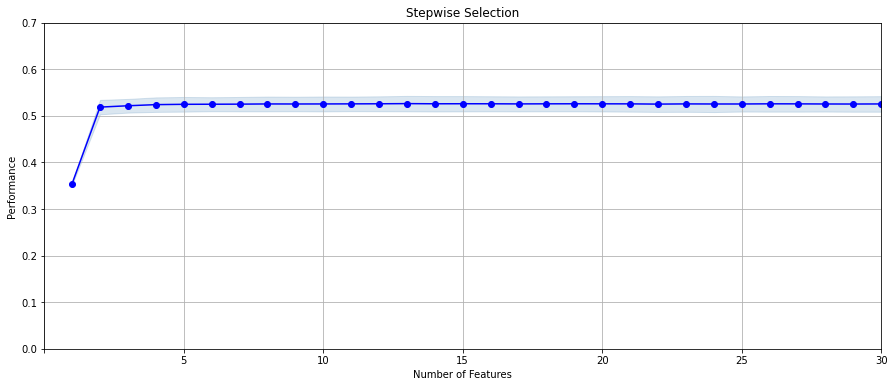

In [110]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev', figsize=(15, 6))
plt.xticks(np.arange(0, len(X.columns), step=5))
plt.ylim([0., .7])
plt.xlim(0,num_wrapper)
plt.title('Stepwise Selection')
plt.grid()
plt.savefig('FS_fdr.png')
plt.show()

In [113]:
vars_FS = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
vars_FS

# added = []
# first = nfeatures[1]
# prev = set(first)
# added.append(list(prev)[0])
# for i in nfeatures[1:]:
#     i = set(i)
#     diff = i - prev
#     prev = i
#     added.append(list(diff)[0])
    
# vars_FS['variable_added'] = added
# vars_FS

ordered_vars_FS = vars_FS.copy()
for i in range(len(ordered_vars_FS)):
    ordered_vars_FS.loc[i+1,'add variables in this order'] = int(i+1)
    if i+1 == 1:
        ordered_vars_FS.loc[i+1,'variable name'] = list(ordered_vars_FS.loc[i+1,'feature_names'])[0]
    else:
        ordered_vars_FS.loc[i+1,'variable name'] = set(ordered_vars_FS.loc[i+1,'feature_names']) - set(ordered_vars_FS.loc[i,'feature_names'])


In [126]:
ordered_vars_FS.head(2)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,add variables in this order,variable name
1,"(4,)","[0.3519066689883336, 0.3569562946195368]",0.354431,"(shortadd_zip3_count_30,)",0.010863,0.002525,0.002525,1.0,shortadd_zip3_count_30
2,"(4, 99)","[0.5032213129026641, 0.5342155667769458]",0.518718,"(shortadd_zip3_count_30, dob_lastname_count_30)",0.066679,0.015497,0.015497,2.0,dob_lastname_count_30


In [127]:
ordered_vars_FS.to_csv("ordered_vars_FS", index=False)

In [128]:
vars_final = list(ordered_vars_FS.loc[num_wrapper, 'feature_names'])
vars_final

['shortadd_zip3_count_30',
 'address_zip3_count_30',
 'fulladdress_count_30',
 'shortadd_zip5_count_30',
 'address_zip3_count_7',
 'shortadd_zip5_count_7',
 'shortaddress_count_7',
 'fulladdress_unique_count_for_dob_homephone_60',
 'fulladdress_unique_count_for_ssnlastname_60',
 'fulladdress_unique_count_for_ssnzip5_60',
 'fulladdress_unique_count_for_ssnfulladdress_60',
 'fulladdress_unique_count_for_ssn_60',
 'fulladdress_unique_count_for_ssnname_dob_60',
 'fulladdress_unique_count_for_name_fulladdress_60',
 'fulladdress_unique_count_for_name_dob_60',
 'fulladdress_unique_count_for_dob_homephone_30',
 'fulladdress_unique_count_for_ssnname_30',
 'fulladdress_unique_count_for_ssnlastname_30',
 'fulladdress_unique_count_for_ssnfulladdress_30',
 'fulladdress_unique_count_for_ssn_30',
 'fulladdress_unique_count_for_ssn_7',
 'fulladdress_unique_count_for_ssnname_7',
 'fulladdress_unique_count_for_ssnname_dob_7',
 'fulladdress_unique_count_for_name_fulladdress_7',
 'fulladdress_unique_count

In [129]:
vars_FS.to_csv('VarsFS.csv', index=False)

In [130]:
sfs.subsets_

{1: {'feature_idx': (4,),
  'cv_scores': array([0.35190667, 0.35695629]),
  'avg_score': 0.35443148180393524,
  'feature_names': ('shortadd_zip3_count_30',)},
 2: {'feature_idx': (4, 99),
  'cv_scores': array([0.50322131, 0.53421557]),
  'avg_score': 0.518718439839805,
  'feature_names': ('shortadd_zip3_count_30', 'dob_lastname_count_30')},
 3: {'feature_idx': (4, 21, 99),
  'cv_scores': array([0.50687794, 0.53630507]),
  'avg_score': 0.5215915026989378,
  'feature_names': ('shortadd_zip3_count_30',
   'fulladdress_unique_count_for_dob_homephone_60',
   'dob_lastname_count_30')},
 4: {'feature_idx': (4, 19, 21, 99),
  'cv_scores': array([0.50844506, 0.53961344]),
  'avg_score': 0.5240292530036565,
  'feature_names': ('shortadd_zip3_count_30',
   'shortaddress_count_7',
   'fulladdress_unique_count_for_dob_homephone_60',
   'dob_lastname_count_30')},
 5: {'feature_idx': (4, 19, 21, 23, 99),
  'cv_scores': array([0.50896744, 0.54048407]),
  'avg_score': 0.5247257530907192,
  'feature_nam

In [131]:
vars_final.append('index_name')
vars_final.append('y_name')
vars_final

['shortadd_zip3_count_30',
 'address_zip3_count_30',
 'fulladdress_count_30',
 'shortadd_zip5_count_30',
 'address_zip3_count_7',
 'shortadd_zip5_count_7',
 'shortaddress_count_7',
 'fulladdress_unique_count_for_dob_homephone_60',
 'fulladdress_unique_count_for_ssnlastname_60',
 'fulladdress_unique_count_for_ssnzip5_60',
 'fulladdress_unique_count_for_ssnfulladdress_60',
 'fulladdress_unique_count_for_ssn_60',
 'fulladdress_unique_count_for_ssnname_dob_60',
 'fulladdress_unique_count_for_name_fulladdress_60',
 'fulladdress_unique_count_for_name_dob_60',
 'fulladdress_unique_count_for_dob_homephone_30',
 'fulladdress_unique_count_for_ssnname_30',
 'fulladdress_unique_count_for_ssnlastname_30',
 'fulladdress_unique_count_for_ssnfulladdress_30',
 'fulladdress_unique_count_for_ssn_30',
 'fulladdress_unique_count_for_ssn_7',
 'fulladdress_unique_count_for_ssnname_7',
 'fulladdress_unique_count_for_ssnname_dob_7',
 'fulladdress_unique_count_for_name_fulladdress_7',
 'fulladdress_unique_count

In [132]:
X_final = df_keep.filter(vars_final, axis=1)
X_final.shape

(794997, 30)

In [133]:
X_final.to_csv('vars_final.csv', index=False)

In [134]:
print('time to here:', dt.datetime.now() - start_time)

time to here: 1:22:07.644326


# Sort VarsFS file

In [87]:
# import pandas as pd
# vars_FS = pd.read_csv('VarsFS.csv')

In [89]:
# vars_FS.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(4,)",[0.35190667 0.35695629],0.354431,"('shortadd_zip3_count_30',)",0.010863,0.002525,0.002525
1,"(4, 99)",[0.50322131 0.52725057],0.515236,"('shortadd_zip3_count_30', 'dob_lastname_count...",0.051695,0.012015,0.012015
2,"(4, 21, 99)",[0.50687794 0.53508619],0.520982,"('shortadd_zip3_count_30', 'fulladdress_unique...",0.060685,0.014104,0.014104
3,"(4, 19, 21, 99)",[0.50896744 0.53961344],0.524290,"('shortadd_zip3_count_30', 'shortaddress_count...",0.065930,0.015323,0.015323
4,"(4, 19, 21, 24, 99)",[0.50896744 0.54065819],0.524813,"('shortadd_zip3_count_30', 'shortaddress_count...",0.068177,0.015845,0.015845


In [123]:
# ordered_vars_FS = vars_FS.copy()
# for i in range(len(ordered_vars_FS)):
#     ordered_vars_FS.loc[i+1,'add variables in this order'] = int(i+1)
#     if i+1 == 1:
#         ordered_vars_FS.loc[i+1,'variable name'] = list(ordered_vars_FS.loc[i+1,'feature_names'])[0]
#     else:
#         ordered_vars_FS.loc[i+1,'variable name'] = set(ordered_vars_FS.loc[i+1,'feature_names']) - set(ordered_vars_FS.loc[i,'feature_names'])


# Vars file for HW 8

In [135]:
#File for HW8
dftemp = pd.read_csv('vars1.csv')


/Users/chinmayibengaluruprakash/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [72]:
#dftemp.head(2)

,Unnamed: 0,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,...,ssnname_dob_unique_count_for_ssnname_7,ssnname_dob_unique_count_for_ssnname_14,ssnname_dob_unique_count_for_ssnname_30,ssnname_dob_unique_count_for_ssnname_60,ssnname_dob_unique_count_for_ssnfulladdress_1,ssnname_dob_unique_count_for_ssnfulladdress_3,ssnname_dob_unique_count_for_ssnfulladdress_7,ssnname_dob_unique_count_for_ssnfulladdress_14,ssnname_dob_unique_count_for_ssnfulladdress_30,ssnname_dob_unique_count_for_ssnfulladdress_60
0,0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,000000-1,1797504115,...,1,1,1,1,1,1,1,1,1,1
1,1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,...,1,1,1,1,1,1,1,1,1,1


In [136]:
df = dftemp.select_dtypes(['number'])

In [137]:
df.head(2)

,Unnamed: 0,record,zip5,fraud_label,low_risk,zip3,name_zip5_day_since,name_zip5_count_0,name_zip5_count_1,name_zip5_count_3,...,ssnname_dob_unique_count_for_ssnname_7,ssnname_dob_unique_count_for_ssnname_14,ssnname_dob_unique_count_for_ssnname_30,ssnname_dob_unique_count_for_ssnname_60,ssnname_dob_unique_count_for_ssnfulladdress_1,ssnname_dob_unique_count_for_ssnfulladdress_3,ssnname_dob_unique_count_for_ssnfulladdress_7,ssnname_dob_unique_count_for_ssnfulladdress_14,ssnname_dob_unique_count_for_ssnfulladdress_30,ssnname_dob_unique_count_for_ssnfulladdress_60
0,0,1,2765,0,0.014499,27,365.0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,2,57169,1,0.014499,571,365.0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [138]:
df_rec_fraud = df.iloc[:,[1,3]]
df_rec_fraud

,record,fraud_label
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
999995,999996,0
999996,999997,0
999997,999998,0
999998,999999,0


In [139]:
df.shape

(1000000, 1045)

In [140]:
final_vars = df.filter(vars_final, axis=1)
final_vars.shape

(1000000, 30)

In [141]:
final_vars_keep = pd.merge(final_vars, df_rec_fraud, how = "inner", left_index=True, right_index=True)

In [142]:
final_vars_keep.shape

(1000000, 32)

In [143]:
final_vars_keep.head(2)

,shortadd_zip3_count_30,address_zip3_count_30,fulladdress_count_30,shortadd_zip5_count_30,address_zip3_count_7,shortadd_zip5_count_7,shortaddress_count_7,fulladdress_unique_count_for_dob_homephone_60,fulladdress_unique_count_for_ssnlastname_60,fulladdress_unique_count_for_ssnzip5_60,...,fulladdress_unique_count_for_ssnname_dob_7,fulladdress_unique_count_for_name_fulladdress_7,fulladdress_unique_count_for_name_dob_7,homephone_address_count_30,homephone_zip5_count_30,fulladdress_dob_count_30,homephone_fulladdress_dob_count_30,dob_lastname_count_30,record,fraud_label
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,1


In [144]:
rec = final_vars_keep['record']
final_vars_keep.drop(labels=['record'], axis=1,inplace = True)
final_vars_keep.insert(0, 'record', rec)
final_vars_keep

,record,shortadd_zip3_count_30,address_zip3_count_30,fulladdress_count_30,shortadd_zip5_count_30,address_zip3_count_7,shortadd_zip5_count_7,shortaddress_count_7,fulladdress_unique_count_for_dob_homephone_60,fulladdress_unique_count_for_ssnlastname_60,...,fulladdress_unique_count_for_ssnname_7,fulladdress_unique_count_for_ssnname_dob_7,fulladdress_unique_count_for_name_fulladdress_7,fulladdress_unique_count_for_name_dob_7,homephone_address_count_30,homephone_zip5_count_30,fulladdress_dob_count_30,homephone_fulladdress_dob_count_30,dob_lastname_count_30,fraud_label
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
999996,999997,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
999997,999998,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
999998,999999,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [145]:
final_vars_keep.to_csv('vars_final_for_HW8.csv', index=False)